# Predicting Mobile Phone Price Range
A man named Bob has started his own mobile company. He wants to give tough fight to big companies like Apple, Samsung, etc. 
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Dataset from [Kaggle](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv).


## Problems
1. What is the relation between features of a mobile phone and its selling price range?
2. Is it possible to make Machine Learning model to predict mobile phone price range?

## Goals
1. Find out what's the relation between features of a mobile phone and its selling price range.
2. Make a Machine Learning model to predict price range for the mobile phone to assist Bob sell his phones.

# 1) Preparation of Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mobile = pd.read_csv("/content/drive/My Drive/Datasets/mobile_price_train.csv")
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#2) Explaination of Each Column

In [ ]:
col_detail = ["Total energy a battery can store in one time measured in mAh.",
              "Has bluetooth or not.",
              "Speed at which microprocessor executes instructions.",
              "Has dual sim support or not.",
              "Front Camera mega pixels.",
              "Has 4G or not.",
              "Internal Memory in Giga Bytes.",
              "Mobile Depth in cm.",
              "Weight of mobiel phone.",
              "Number of cores of processor.",
              "Primary Camera mega pixels.",
              "Pixel Resolution Height.",
              "Pixel Resolution Width.",
              "Random Access Memory in Mega Bytes.",
              "Screen Height of mobile in cm.",
              "Screen Width of mobile in cm.",
              "Longest time that a single battery charge will last when you are.",
              "Has 3G or not.",
              "Has touch screen or not.",
              "Has wifi or not.",
              "This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)."]

descr = []
j = 0
for name in mobile.columns:
  descr.append(
      [
       name,
       mobile[name].dtypes,
       mobile[name].isnull().sum(),
       round(mobile[name].isnull().sum()/len(mobile)*100, 2),
       mobile[name].nunique(),
       mobile[name].unique(),
       col_detail[j]
       ]
       )
  j += 1

column_desc = pd.DataFrame(descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(mobile.columns)} columns.")

Total column of this data set is: 21 columns.


In [ ]:
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,battery_power,int64,0,0.0,1094,"[842, 1021, 563, 615, 1821, 1859, 1954, 1445, ...",Total energy a battery can store in one time m...
1,blue,int64,0,0.0,2,"[0, 1]",Has bluetooth or not.
2,clock_speed,float64,0,0.0,26,"[2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, ...",Speed at which microprocessor executes instruc...
3,dual_sim,int64,0,0.0,2,"[0, 1]",Has dual sim support or not.
4,fc,int64,0,0.0,20,"[1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8...",Front Camera mega pixels.
5,four_g,int64,0,0.0,2,"[0, 1]",Has 4G or not.
6,int_memory,int64,0,0.0,63,"[7, 53, 41, 10, 44, 22, 24, 9, 33, 17, 52, 46,...",Internal Memory in Giga Bytes.
7,m_dep,float64,0,0.0,10,"[0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, ...",Mobile Depth in cm.
8,mobile_wt,int64,0,0.0,121,"[188, 136, 145, 131, 141, 164, 139, 187, 174, ...",Weight of mobiel phone.
9,n_cores,int64,0,0.0,8,"[2, 3, 5, 6, 1, 8, 4, 7]",Number of cores of processor.


# 3) Outliers

In [ ]:
mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


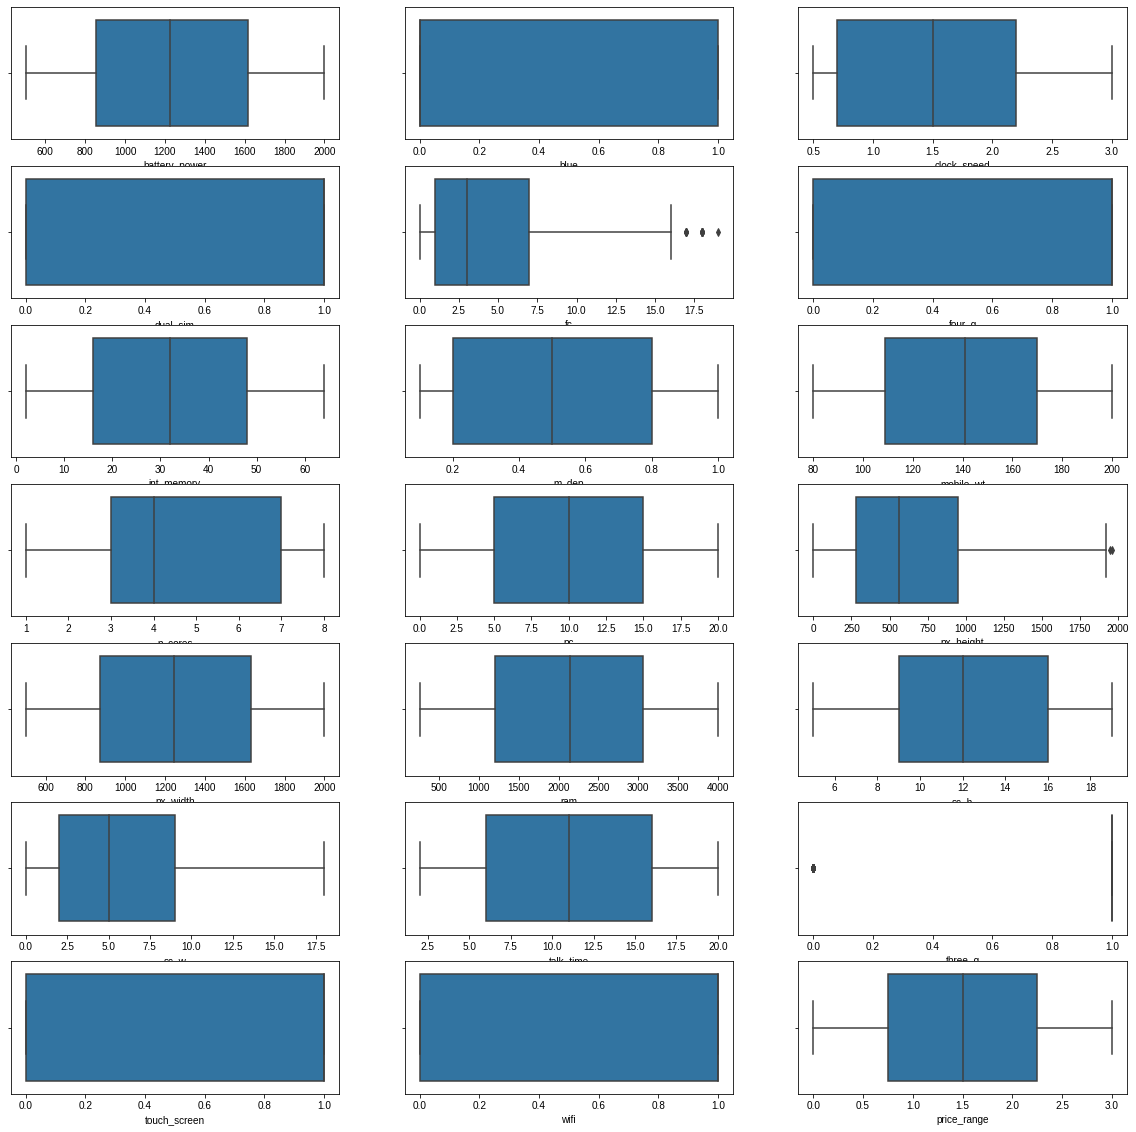

In [ ]:
plt.figure(figsize = (20,20))

n = 1
for name in mobile.describe().columns:
  plt.subplot(7,3,n)
  sns.boxplot(mobile[name])
  n += 1

plt.style.use('seaborn-whitegrid')
plt.show()

## fc - Front Camera

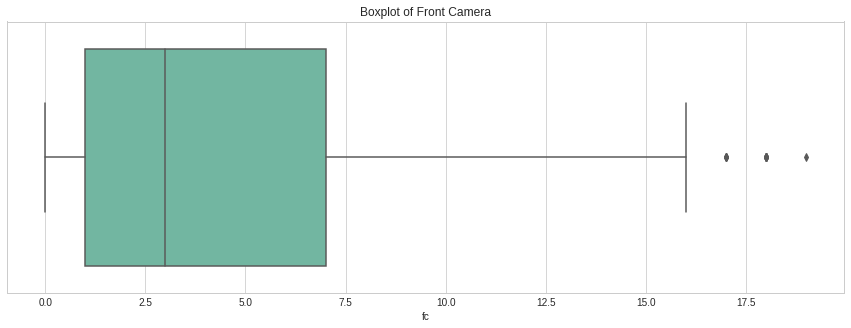

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'fc', data = mobile, palette = 'Set2')
plt.title('Boxplot of Front Camera')
plt.show()

In [ ]:
Q1_fc = mobile.describe()['fc']['25%']
Q3_fc = mobile.describe()['fc']['75%']
IQR_fc = Q3_fc - Q1_fc
UpFence_fc = Q3_fc + (1.5 * IQR_fc)
LoFence_fc = Q1_fc - (1.5 * IQR_fc)
out_fc = (mobile['fc'] < LoFence_fc) | (mobile['fc'] > UpFence_fc)

mobile[out_fc].sort_values(by = 'fc')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1549,1772,1,1.6,0,17,1,45,0.5,159,2,18,837,1405,1146,6,1,17,1,1,0,1
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
1880,1720,0,1.6,0,18,1,2,0.8,188,5,20,334,896,2522,10,5,2,1,0,1,2
1693,695,0,0.5,0,18,1,12,0.6,196,2,19,1649,1829,2855,16,13,7,1,1,1,2
1554,1957,0,1.2,1,18,1,36,0.8,151,2,19,1194,1727,1115,16,2,18,1,0,1,1


In [ ]:
print(f"Outliers of Fron Camera column is above {UpFence_fc} megapixels.")
print(f"Total data which counted as an outliers is {len(mobile[out_fc].sort_values(by = 'fc'))} of {len(mobile)} rows.")
print(f"It's{(len(mobile[out_fc]) ) / len(mobile) * 100 : .2f}% from the entire rows.")

Outliers of Fron Camera column is above 16.0 megapixels.
Total data which counted as an outliers is 18 of 2000 rows.
It's 0.90% from the entire rows.


## px_height - Pixel Height

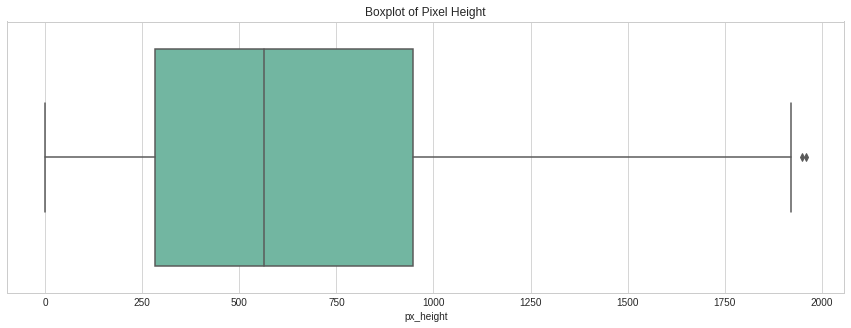

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'px_height', data = mobile, palette = 'Set2')
plt.title('Boxplot of Pixel Height')
plt.show()

In [ ]:
Q1_px = mobile.describe()['px_height']['25%']
Q3_px = mobile.describe()['px_height']['75%']
IQR_px = Q3_px - Q1_px
UpFence_px = Q3_px + (1.5 * IQR_px)
LoFence_px = Q1_px - (1.5 * IQR_px)
out_px = (mobile['px_height'] < LoFence_px) | (mobile['px_height'] > UpFence_px)

mobile[out_px].sort_values(by = 'px_height')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


In [ ]:
print(f"Outliers of Pixel Height column is above {UpFence_px} .")
print(f"Total data which counted as an outliers is {len(mobile[out_px].sort_values(by = 'px_height'))} of {len(mobile)} rows.")
print(f"It's{(len(mobile[out_px]) ) / len(mobile) * 100 : .2f}% from the entire rows.")

Outliers of Pixel Height column is above 1944.0 .
Total data which counted as an outliers is 2 of 2000 rows.
It's 0.10% from the entire rows.


# 4) Exploratory Data Analysis

## Univariate

In [ ]:
mobile.describe().T

# We see that the average of each specification is:
    # battery_power = 1238 mAh
    # clock_speed = 1.52
    # fc = 4.3 Mega Pixels
    # int_memory = 32.0 GB
    # m_dep = 0.5 cm
    # mobile_wt = 140.25 grams
    # n_cores = 4-5 cores
    # pc = 10 Mega Pixels
    # px_height = 645.11 pixels
    # px_width = 645.1 pixels
    # ram = 2124 MB
    # sc_h = 12.31 cm
    # sc_w = 5.8 cm
    # talk_time = 11 minutes
    # price_range = Medium - High cost

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,battery_power,int64,0,0.0,1094,"[842, 1021, 563, 615, 1821, 1859, 1954, 1445, ...",Total energy a battery can store in one time m...
1,blue,int64,0,0.0,2,"[0, 1]",Has bluetooth or not.
2,clock_speed,float64,0,0.0,26,"[2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, ...",Speed at which microprocessor executes instruc...
3,dual_sim,int64,0,0.0,2,"[0, 1]",Has dual sim support or not.
4,fc,int64,0,0.0,20,"[1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8...",Front Camera mega pixels.
5,four_g,int64,0,0.0,2,"[0, 1]",Has 4G or not.
6,int_memory,int64,0,0.0,63,"[7, 53, 41, 10, 44, 22, 24, 9, 33, 17, 52, 46,...",Internal Memory in Giga Bytes.
7,m_dep,float64,0,0.0,10,"[0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, ...",Mobile Depth in cm.
8,mobile_wt,int64,0,0.0,121,"[188, 136, 145, 131, 141, 164, 139, 187, 174, ...",Weight of mobiel phone.
9,n_cores,int64,0,0.0,8,"[2, 3, 5, 6, 1, 8, 4, 7]",Number of cores of processor.


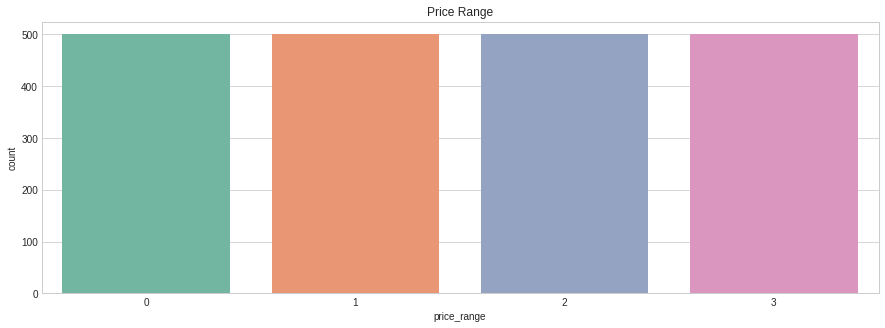

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['price_range'], palette = 'Set2')
plt.title("Price Range")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['price_range'], cum_cols = False)

# we see that this dataset has a well-balance target
# it's obvious since this is a syntethic dataset but let's explore another features

,price_range,count,percent
0,3,500,25.0
1,2,500,25.0
2,1,500,25.0
3,0,500,25.0


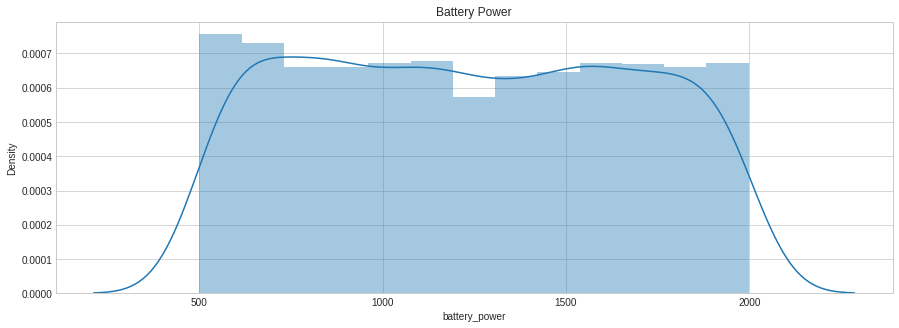

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(mobile['battery_power'])
plt.title("Battery Power")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['battery_power'], cum_cols = False).head(10)

# we see that the battery power's range is between 500 to 2000 mAh
# we can say that this dataset tells us about phones from 2010-2013 
# because in 2020, battery power has a lot of improvement in the number of mAh

,battery_power,count,percent
0,1872,6,0.30
1,1589,6,0.30
2,618,6,0.30
3,1949,5,0.25
4,1807,5,0.25
5,1715,5,0.25
6,1512,5,0.25
7,1414,5,0.25
8,1413,5,0.25
9,1379,5,0.25


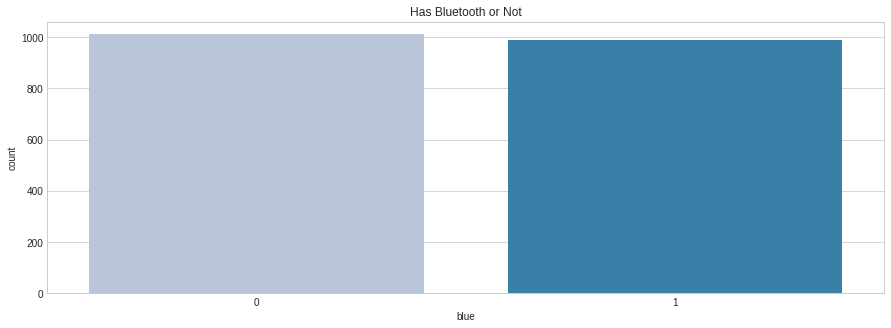

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['blue'], palette = 'PuBu')
plt.title("Has Bluetooth or Not")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['blue'], cum_cols = False)

# 50.5% phones has bluetooth built in while 49.5% are not

,blue,count,percent
0,0,1010,50.5
1,1,990,49.5


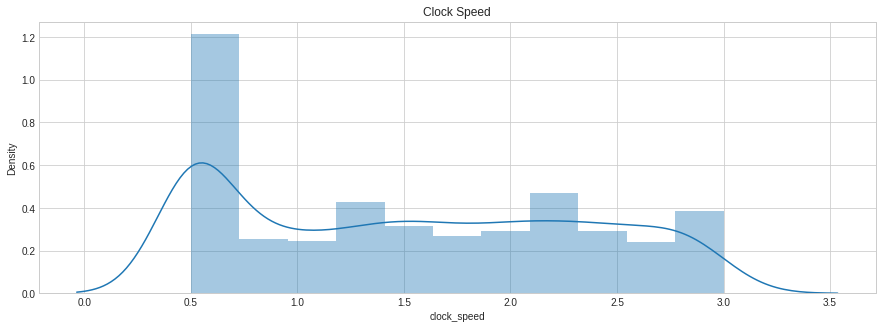

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(mobile['clock_speed'])
plt.title("Clock Speed")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['clock_speed'], cum_cols = False).head(10)

# we see that 20.65% of the phones have CPU clock speed at 0.5 GHz

,clock_speed,count,percent
0,0.5,413,20.65
1,2.8,85,4.25
2,2.3,78,3.90
3,2.1,76,3.80
4,1.6,76,3.80
5,2.5,74,3.70
6,0.6,74,3.70
7,1.4,70,3.50
8,1.3,68,3.40
9,2.0,67,3.35


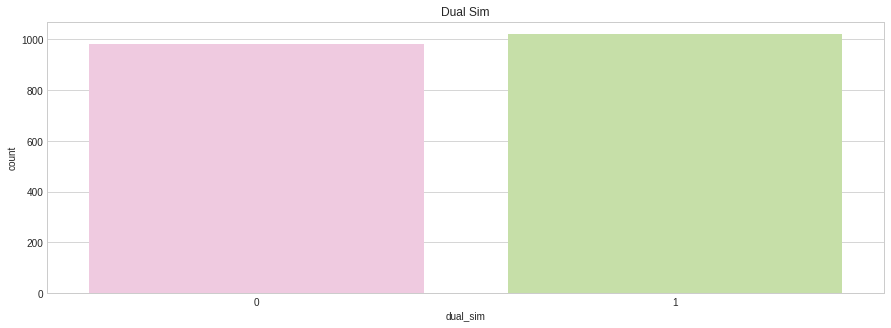

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['dual_sim'], palette = 'PiYG')
plt.title("Dual Sim")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['dual_sim'], cum_cols = False)

# 50.95% phones have dual sim

,dual_sim,count,percent
0,1,1019,50.95
1,0,981,49.05


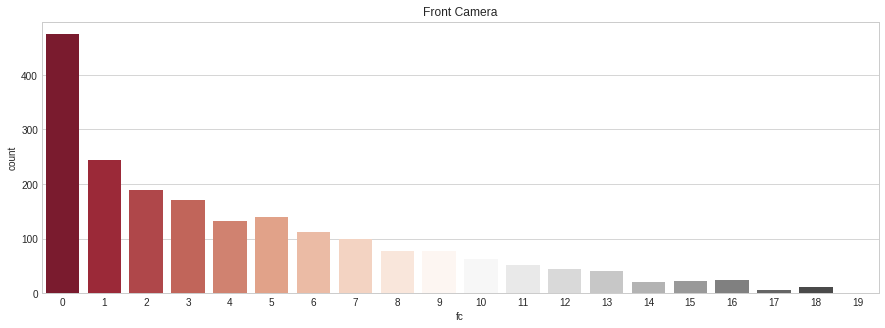

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['fc'], palette = 'RdGy')
plt.title("Front Camera")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['fc'], cum_cols = False)

# 23.7% phones have not front camera, while 12.25% phones which have front camera with 1 Mega Pixels (MP)
# Only 3.05% phones which have front camera with above 15 MP

,fc,count,percent
0,0,474,23.70
1,1,245,12.25
2,2,189,9.45
3,3,170,8.50
4,5,139,6.95
5,4,133,6.65
6,6,112,5.60
7,7,100,5.00
8,9,78,3.90
9,8,77,3.85


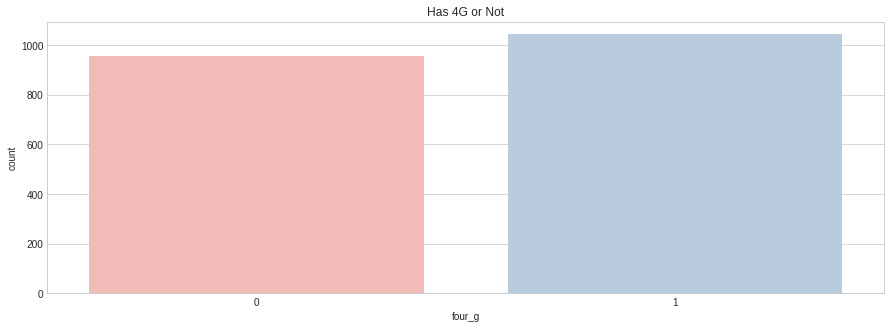

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['four_g'], palette = 'Pastel1')
plt.title("Has 4G or Not")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['four_g'], cum_cols = False)

# 52.15% phones are built-in with 4G ready

,four_g,count,percent
0,1,1043,52.15
1,0,957,47.85


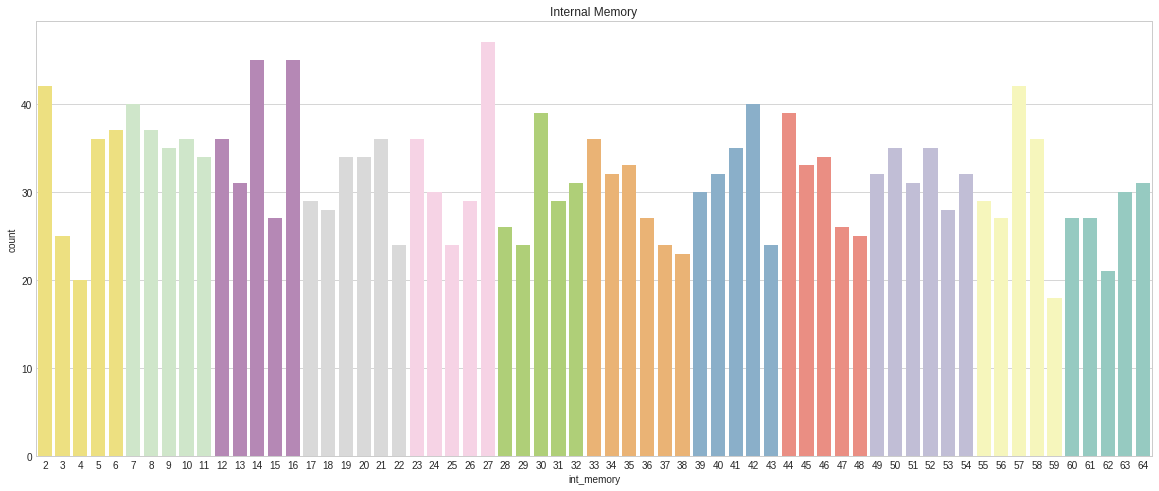

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(mobile['int_memory'], palette = 'Set3_r')
plt.title("Internal Memory")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['int_memory'], cum_cols = False).head(10)

# Top 10 Internal Memory are: 27 GB, 16 GB, 14 GB, 57 GB, 2 GB, 42 GB, 7 GB, 44 GB, 30 GB and 8 GB.

,int_memory,count,percent
0,27,47,2.35
1,16,45,2.25
2,14,45,2.25
3,57,42,2.10
4,2,42,2.10
5,42,40,2.00
6,7,40,2.00
7,44,39,1.95
8,30,39,1.95
9,8,37,1.85


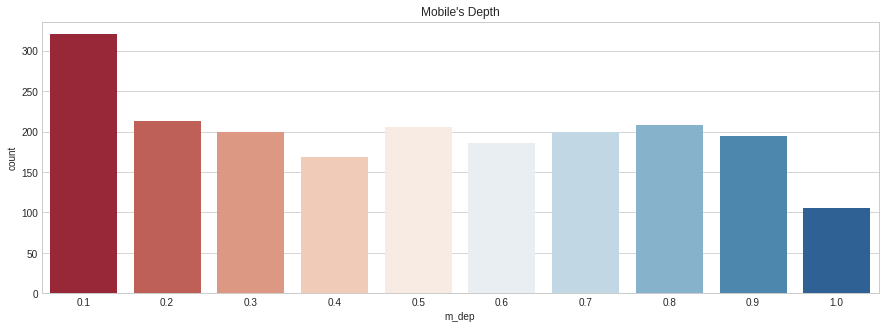

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['m_dep'], palette = 'RdBu')
plt.title("Mobile's Depth")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['m_dep'], cum_cols = False)

# 16% mobile's depth are 0.1 cm
# 10.65% mobile's depth are 0.2 cm
# 10.40% mobile's depth are 0.8 cm
# we see that most of the phones still has a slim body

,m_dep,count,percent
0,0.1,320,16.00
1,0.2,213,10.65
2,0.8,208,10.40
3,0.5,205,10.25
4,0.7,200,10.00
5,0.3,199,9.95
6,0.9,195,9.75
7,0.6,186,9.30
8,0.4,168,8.40
9,1.0,106,5.30


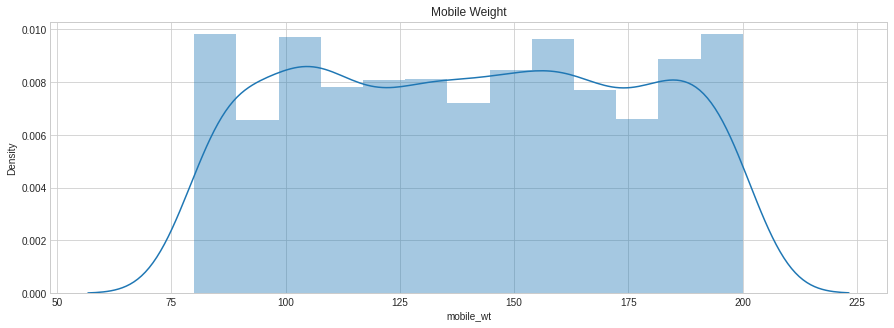

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(mobile['mobile_wt'])
plt.title("Mobile Weight")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['mobile_wt'], cum_cols = False).head()

# phones with weight 182 grams are the most contributed in sales

,mobile_wt,count,percent
0,182,28,1.40
1,185,27,1.35
2,101,27,1.35
3,199,26,1.30
4,146,26,1.30


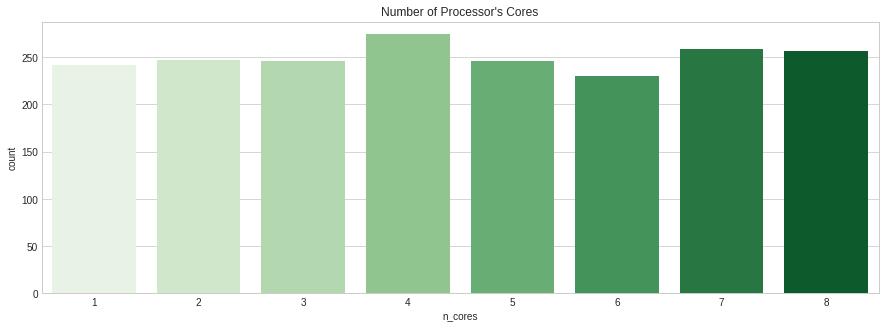

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['n_cores'], palette = 'Greens')
plt.title("Number of Processor's Cores")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['n_cores'], cum_cols = False)

# phone with 4 of processor's cores are the most contributed in sales

,n_cores,count,percent
0,4,274,13.70
1,7,259,12.95
2,8,256,12.80
3,2,247,12.35
4,5,246,12.30
5,3,246,12.30
6,1,242,12.10
7,6,230,11.50


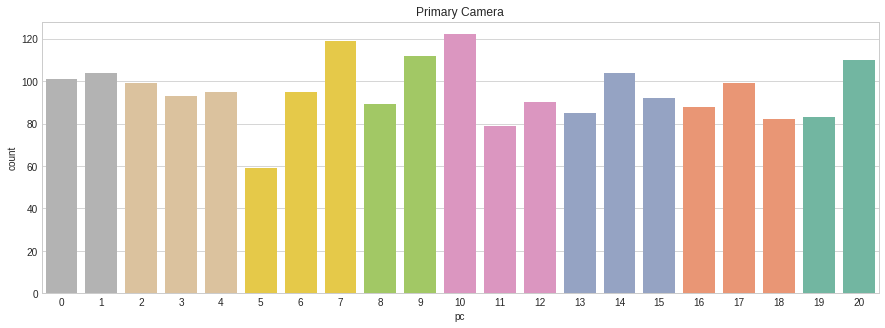

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['pc'], palette = 'Set2_r')
plt.title("Primary Camera")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['pc'], cum_cols = False)

# 5.05% phones still sold without primary camera
# 6.10% phones are sold with primary camera 10 MP

,pc,count,percent
0,10,122,6.10
1,7,119,5.95
2,9,112,5.60
3,20,110,5.50
4,14,104,5.20
5,1,104,5.20
6,0,101,5.05
7,17,99,4.95
8,2,99,4.95
9,6,95,4.75


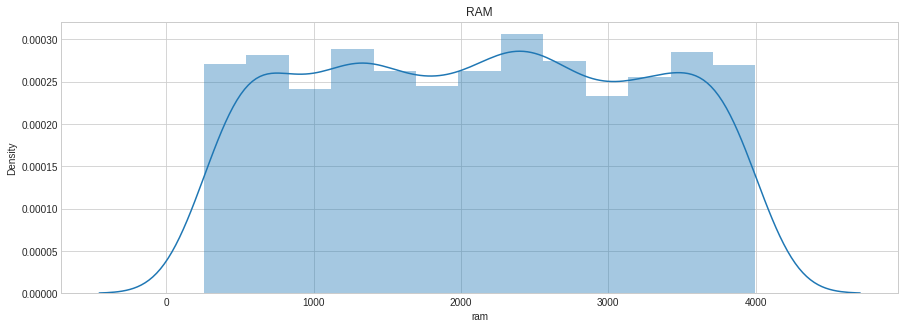

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(mobile['ram'])
plt.title("RAM")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['ram'], cum_cols = False).head()

# Top 5 Sales are phones with RAM: 3142 MB, 2610 MB, 2227 MB, 1464 MB, and 1229 MB

,ram,count,percent
0,3142,4,0.2
1,2610,4,0.2
2,2227,4,0.2
3,1464,4,0.2
4,1229,4,0.2


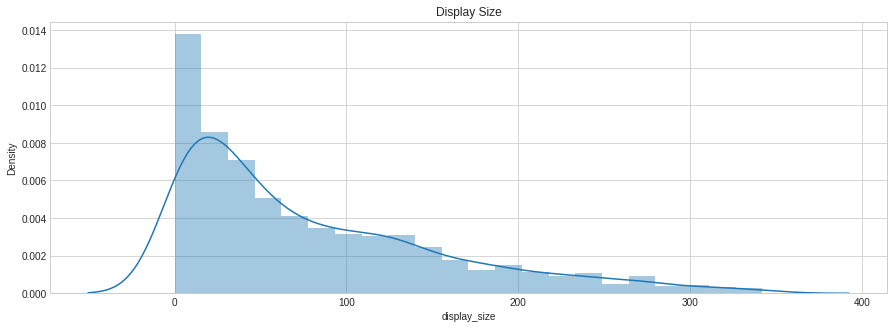

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(mobile['display_size'])
plt.title("Display Size")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['display_size'], cum_cols = False).head()

# basically, screen display size and resolution size has the same distribution: right-skewed distributions
# there's no way a phone with display size 0 cm2, so we gonna drop those data

,display_size,count,percent
0,0,180,9.00
1,24,44,2.20
2,30,39,1.95
3,10,37,1.85
4,32,34,1.70


In [ ]:
mobile.drop(mobile[mobile['display_size'] == 0].index, inplace = True)

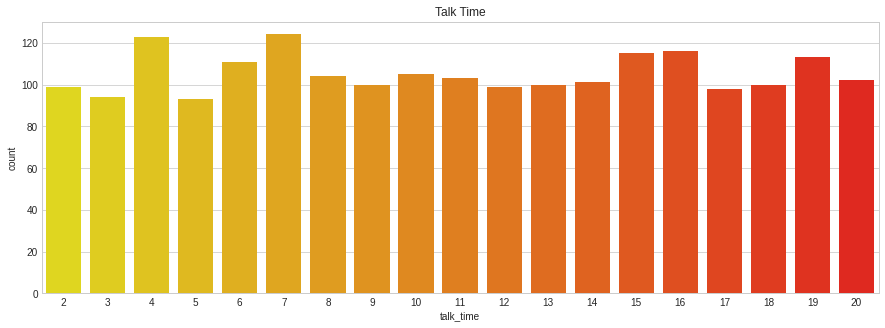

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['talk_time'], palette = 'autumn_r')
plt.title("Talk Time")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['talk_time'], cum_cols = False)

# phones with talk time 7 minutes are the most contributed in sales

,talk_time,count,percent
0,7,124,6.20
1,4,123,6.15
2,16,116,5.80
3,15,115,5.75
4,19,113,5.65
5,6,111,5.55
6,10,105,5.25
7,8,104,5.20
8,11,103,5.15
9,20,102,5.10


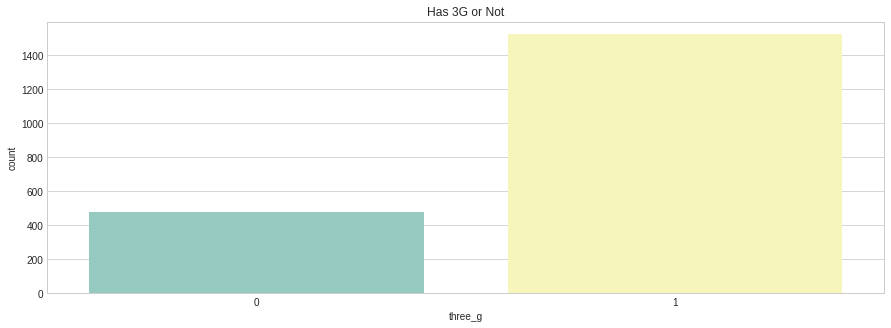

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['three_g'], palette = 'Set3')
plt.title("Has 3G or Not")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['three_g'], cum_cols = False)

# 76% phones has a built-in 3G ready

,three_g,count,percent
0,1,1523,76.15
1,0,477,23.85


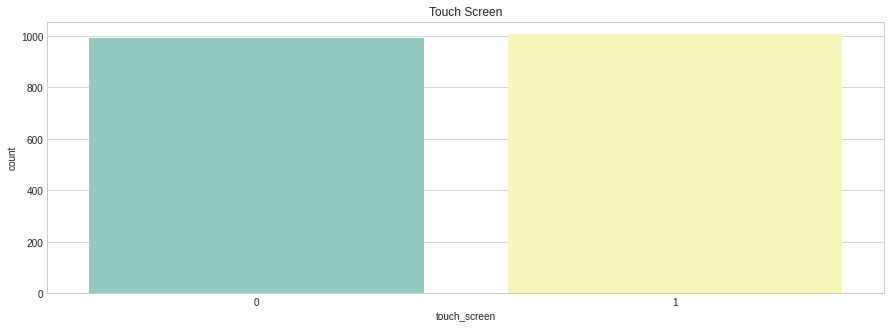

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['touch_screen'], palette = 'Set3')
plt.title("Touch Screen")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['touch_screen'], cum_cols = False)

# 50.3% phones already touch screen

,touch_screen,count,percent
0,1,1006,50.3
1,0,994,49.7


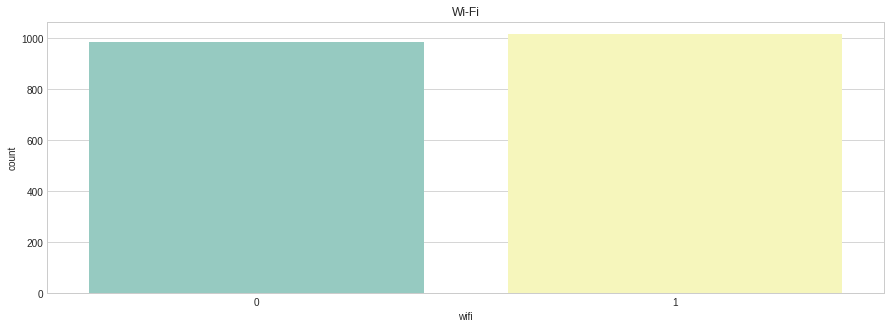

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(mobile['wifi'], palette = 'Set3')
plt.title("Wi-Fi")

plt.show()
plt.style.use('seaborn-whitegrid')

In [ ]:
mobile.stb.freq(['wifi'], cum_cols = False)

# 50.7% phones already has wifi

,wifi,count,percent
0,1,1014,50.7
1,0,986,49.3


## Multivariate

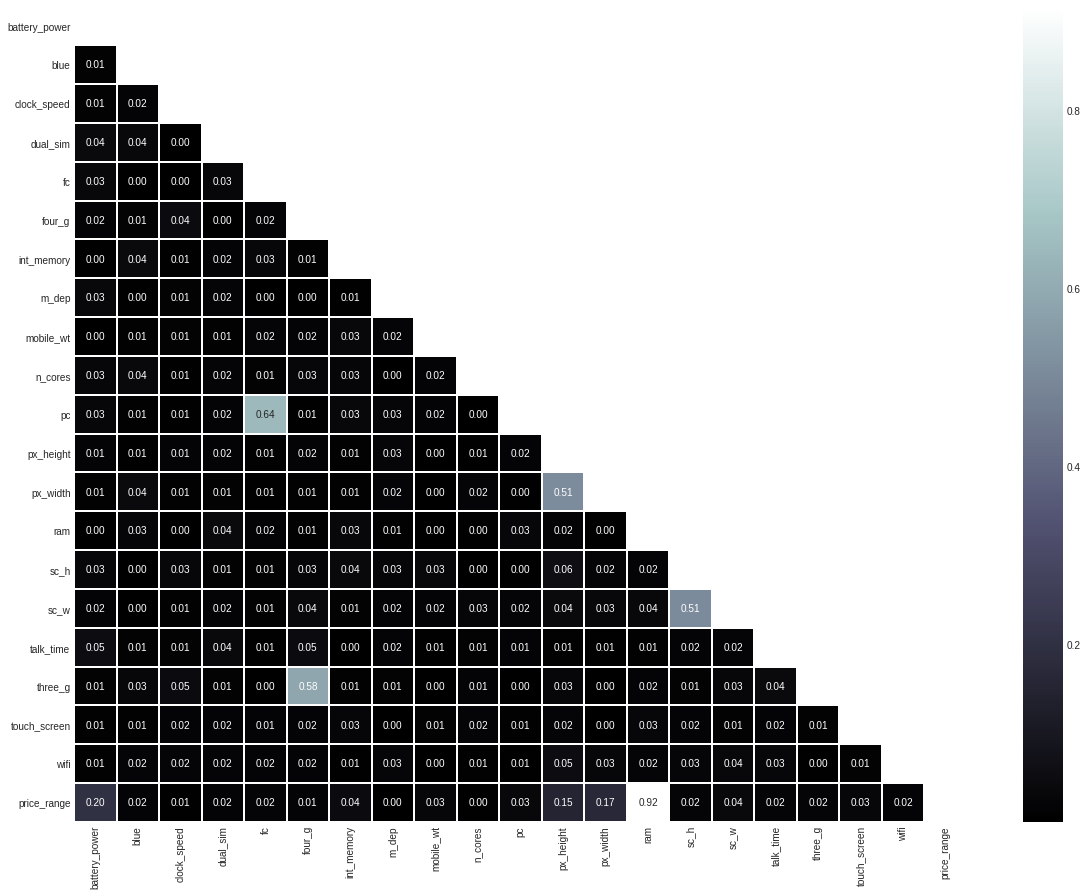

In [ ]:
corr = mobile.corr().abs()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (20,15))
sns.heatmap(corr, mask = mask, cmap = 'bone', annot = True, linewidths = 1, fmt = '.2f')
plt.show()

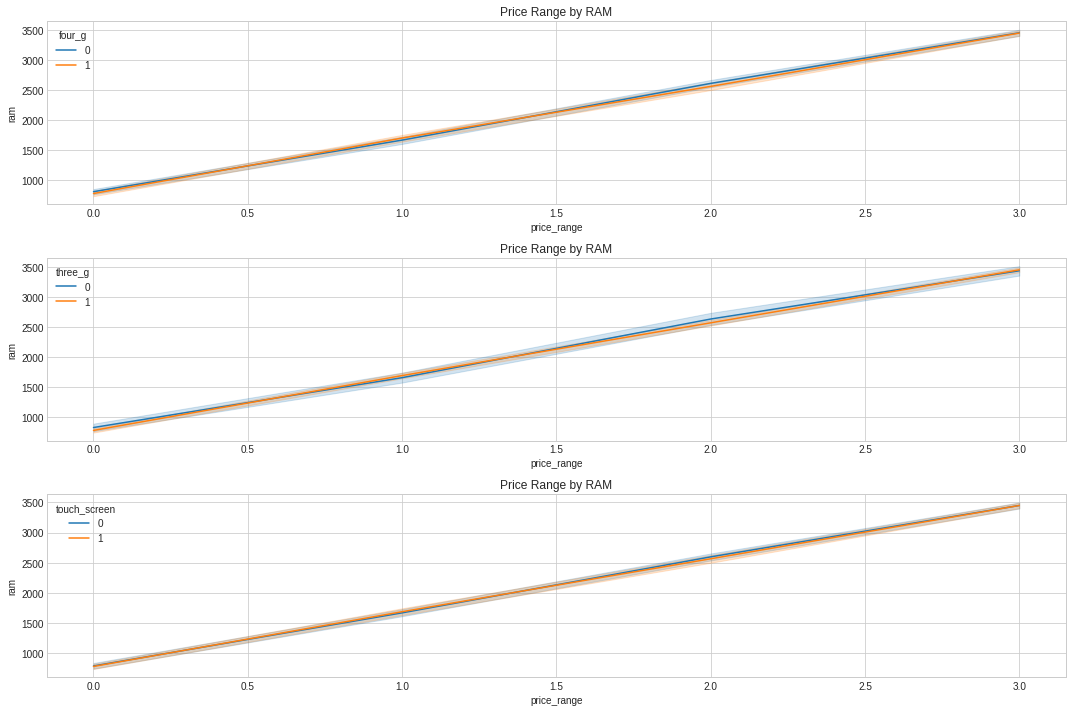

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
sns.lineplot(mobile['price_range'], mobile['ram'], hue = mobile['four_g'])
plt.title("Price Range by RAM")

plt.subplot(3,1,2)
sns.lineplot(mobile['price_range'], mobile['ram'], hue = mobile['three_g'])
plt.title("Price Range by RAM")

plt.subplot(3,1,3)
sns.lineplot(mobile['price_range'], mobile['ram'], hue = mobile['touch_screen'])
plt.title("Price Range by RAM")

plt.tight_layout()
plt.show()
plt.style.use('seaborn-whitegrid')

# we see that higher the RAM, higher the price range despite it has 4G, 3G, or touch screen.

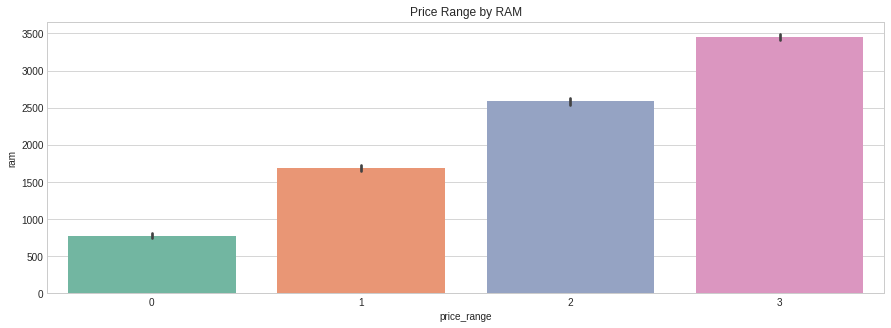

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(data = mobile, x = 'price_range', y = 'ram', palette = 'Set2')
plt.title("Price Range by RAM")

plt.style.use('seaborn-whitegrid')
plt.show()

# we see that higher the RAM, higher the price range despite it has 4G, 3G, or touch screen.

In [ ]:
(pd.crosstab(index = mobile['price_range'], values = mobile['ram'], columns = 'Average of RAM', aggfunc = 'mean', normalize=True)*100).round(2)

col_0,Average of RAM
price_range,
0,9.24
1,19.77
2,30.40
3,40.59


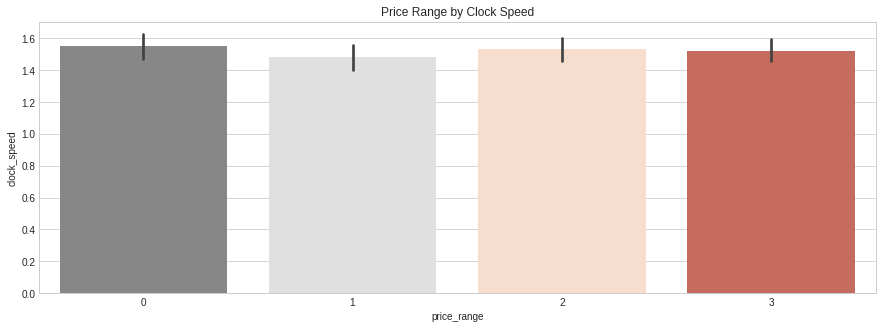

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(data = mobile, x = 'price_range', y = 'clock_speed', palette = 'RdGy_r')
plt.title("Price Range by Clock Speed")

plt.style.use('seaborn-whitegrid')
plt.show()



In [ ]:
(pd.crosstab(index = mobile['price_range'], values = mobile['clock_speed'], 
             columns = 'Average of Clock Speed', aggfunc = 'mean', 
             normalize = True)*100).round(2)

# Phone sales in cheapest cost has the average of clock speed

col_0,Average of Clock Speed
price_range,
0,25.46
1,24.45
2,25.12
3,24.97


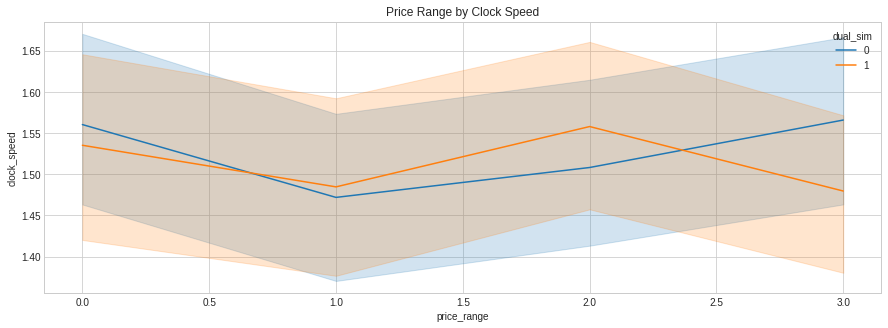

In [ ]:
plt.figure(figsize = (15,5))

sns.lineplot(data = mobile, x = 'price_range', y = 'clock_speed', hue ='dual_sim')
plt.title("Price Range by Clock Speed")

plt.style.use('seaborn-whitegrid')
plt.show()

# we see that phone which has not dual sim tend to has higher clock speed in higher price range
    # than phone which has dual sim

In [ ]:
pd.crosstab(index = mobile['price_range'], values = mobile['clock_speed'], columns = mobile['dual_sim'], aggfunc = 'mean')

dual_sim,0,1
price_range,,
0,1.558400,1.542000
1,1.481224,1.495686
2,1.498406,1.561446
3,1.556596,1.488302


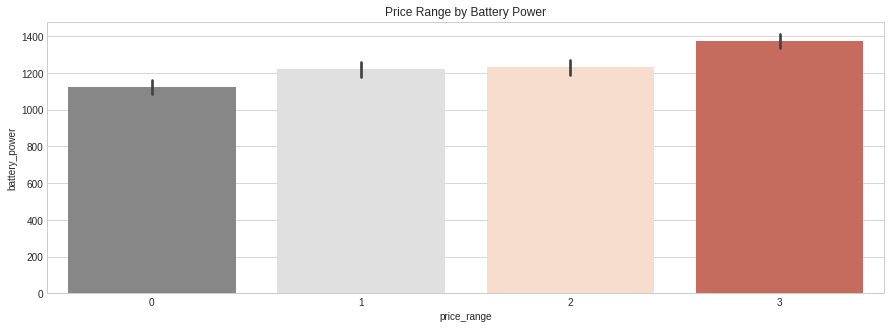

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(data = mobile, x = 'price_range', y = 'battery_power', palette = 'RdGy_r')
plt.title("Price Range by Battery Power")

plt.style.use('seaborn-whitegrid')
plt.show()

# The average of battery power in price range 3 is the highest with 1374 mAh.
# the higher battery power in phone, the higher its price range.

In [ ]:
pd.crosstab(index = mobile['price_range'], values = mobile['battery_power'], columns = 'Average of Battery Power', aggfunc = 'mean')

col_0,Average of Battery Power
price_range,
0,1124.168514
1,1219.752212
2,1229.868421
3,1374.681128


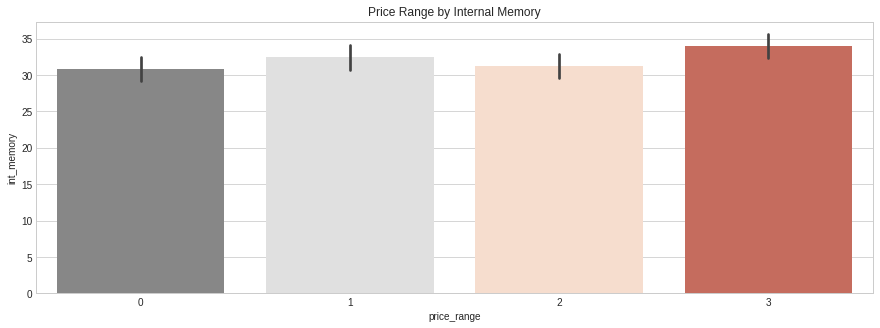

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(data = mobile, x = 'price_range', y = 'int_memory', palette = 'RdGy_r')
plt.title("Price Range by Internal Memory")

plt.style.use('seaborn-whitegrid')
plt.show()

# The average of Internal Memory in price range 3 is the highest with 34 GB.

In [ ]:
pd.crosstab(index = mobile['price_range'], values = mobile['int_memory'], columns = 'Average of Internal Memory', aggfunc = 'mean')

col_0,Average of Internal Memory
price_range,
0,31.174
1,32.116
2,30.920
3,33.976


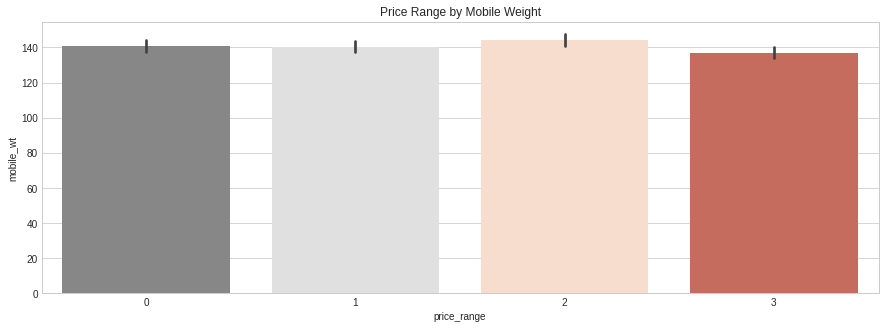

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(data = mobile, x = 'price_range', y = 'mobile_wt', palette = 'RdGy_r')
plt.title("Price Range by Mobile Weight")

plt.style.use('seaborn-whitegrid')
plt.show()

# The average of Mobile's weight in price range 3 is the lightest with 136.3 grams.
# it makes sense since most of phones with price range 3 usually called 'flagship' phone and it turns out with the lightest and most powerful phone

In [ ]:
pd.crosstab(index = mobile['price_range'], values = mobile['mobile_wt'], columns = 'Average of Mobile Weight', aggfunc = 'mean')

col_0,Average of Mobile Weight
price_range,
0,140.552
1,140.510
2,143.614
3,136.320


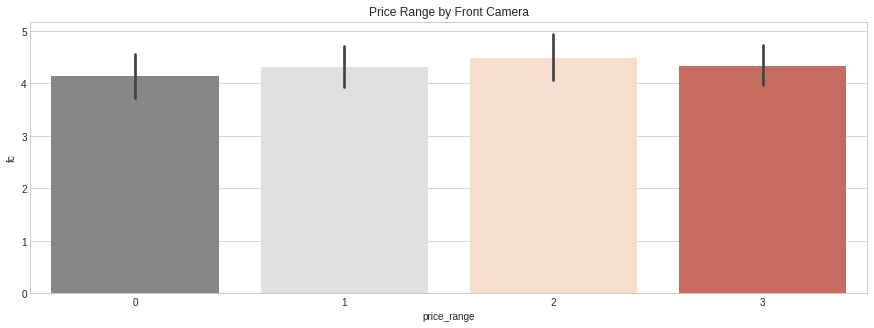

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(data = mobile, x = 'price_range', y = 'fc', palette = 'RdGy_r')
plt.title("Price Range by Front Camera")

plt.style.use('seaborn-whitegrid')
plt.show()

# The average of Front Camera in every price range is 4 Mega Pixels.

In [ ]:
pd.crosstab(index = mobile['price_range'], values = mobile['fc'], columns = 'Average of Face Camera Mega Pixels', aggfunc = 'mean')

col_0,Average of Face Camera Mega Pixels
price_range,
0,4.084
1,4.340
2,4.498
3,4.316


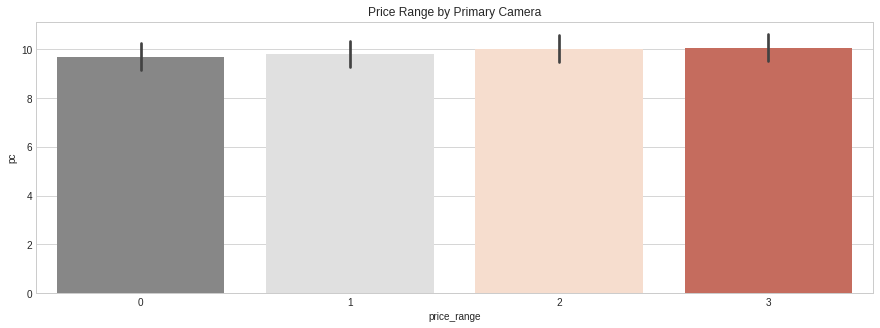

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(data = mobile, x = 'price_range', y = 'pc', palette = 'RdGy_r')
plt.title("Price Range by Primary Camera")

plt.style.use('seaborn-whitegrid')
plt.show()

# The average of Primary Camera in every price range is about 10 Mega Pixels.

In [ ]:
pd.crosstab(index = mobile['price_range'], values = mobile['pc'], columns = 'Average of Primary Camera', aggfunc = 'mean')

col_0,Average of Primary Camera
price_range,
0,9.574
1,9.924
2,10.018
3,10.150


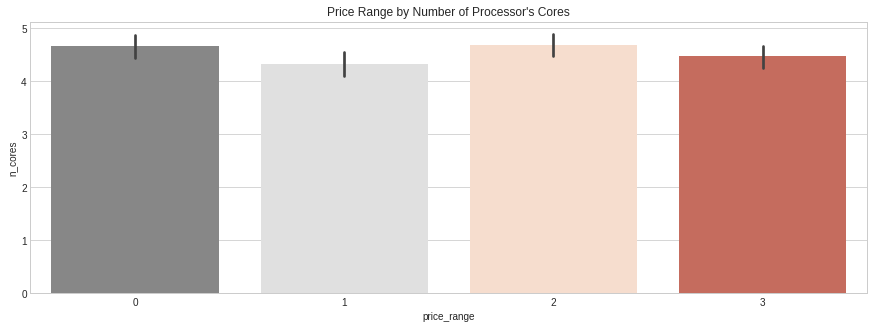

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(data = mobile, x = 'price_range', y = 'n_cores', palette = 'RdGy_r')
plt.title("Price Range by Number of Processor's Cores")

plt.style.use('seaborn-whitegrid')
plt.show()

# The average of Number of Processor's Core in every price range is about 4 cores.

In [ ]:
pd.crosstab(index = mobile['price_range'], values = mobile['n_cores'], columns = 'Average of Number of Processors Core', aggfunc = 'mean')

col_0,Average of Number of Processors Core
price_range,
0,4.600
1,4.298
2,4.682
3,4.502


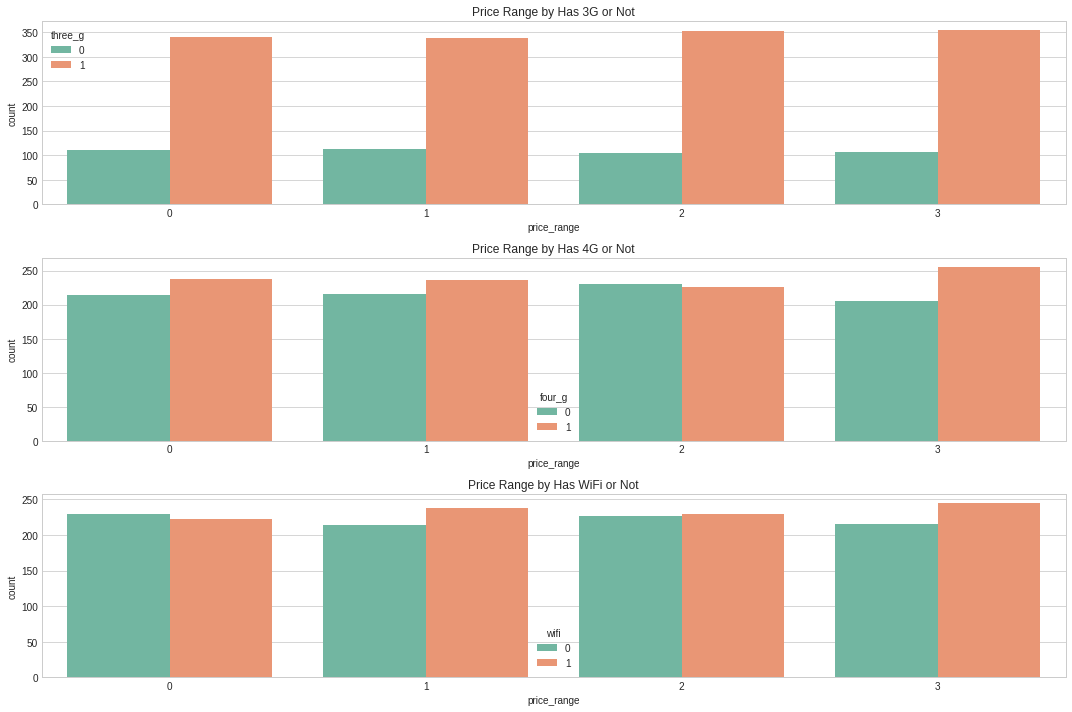

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
sns.countplot(data = mobile, x = 'price_range', hue = 'three_g', palette = 'Set2')
plt.title("Price Range by Has 3G or Not")
# Every price range level has more phone which has 3G ready than phone which has not.

plt.subplot(3,1,2)
sns.countplot(data = mobile, x = 'price_range', hue = 'four_g', palette = 'Set2')
plt.title("Price Range by Has 4G or Not")
# Most price range level are ready with 4G

plt.subplot(3,1,3)
sns.countplot(data = mobile, x = 'price_range', hue = 'wifi', palette = 'Set2')
plt.title("Price Range by Has WiFi or Not")
# Most price range level are built-in with wifi

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = mobile['price_range'], columns = mobile['three_g'])

three_g,0,1
price_range,,
0,127,373
1,122,378
2,113,387
3,115,385


In [ ]:
pd.crosstab(index = mobile['price_range'], columns = mobile['four_g'])

four_g,0,1
price_range,,
0,241,259
1,238,262
2,253,247
3,225,275


In [ ]:
pd.crosstab(index = mobile['price_range'], columns = mobile['wifi'])

wifi,0,1
price_range,,
0,252,248
1,248,252
2,248,252
3,238,262


# 5) Feature Engineering

## Display Size
'sc_h' * 'sc_w'

In [ ]:
mobile['display_size'] = mobile['sc_h'] * mobile['sc_w']

In [ ]:
mobile.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [ ]:
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,display_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,15,1,1,0,1,16


In [ ]:
mobile.drop(mobile[mobile['display_size'] == 0].index, inplace = True)

# 6) Machine Learning Modelling

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
scaler_robust = RobustScaler()

In [ ]:
X = mobile.drop('price_range', axis = 1)
y = mobile['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                                        y, 
                                                                        test_size = 0.15, 
                                                                        random_state = 88,
                                                                        stratify = y)

X_train_sc = scaler_robust.fit_transform(X_train)
X_test_sc = scaler_robust.transform(X_test)

In [ ]:
initial = LogisticRegression()
initial.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = initial.predict(X_test_sc)

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit = pd.DataFrame(data = {
    "Training" : initial.score(X_train_sc, y_train),
    "Testing"  : initial.score(X_test_sc, y_test)
}, index = ['Logistic Regression'])

fit

# Unscaled | MinMax | Robust | Standard
# Tr vs. Ts 
# 0.639 vs. 0.643 | 0.936 vs. 0.937 | 0.971 vs. 0.957 | 0.981 vs. 0.957

,Training,Testing
Logistic Regression,0.965094,0.959707


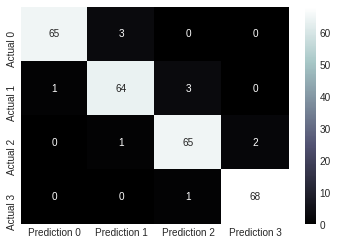

In [ ]:
init_cm = confusion_matrix(y_test, pred, labels = [0,1,2,3])
init_cm_df = pd.DataFrame(data = init_cm,  
                          columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                        index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(init_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
init_cm_df

# Unscaled | MinMax | Robust | Standard
# TP = 43 | 65 | 69 | 68
# TN = 61 | 73 | 73 | 73
# FP = 14 | 2  | 2  | 2
# FN = 11 | 9  | 6  | 5

,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,65,3,0,0
Actual 1,1,64,3,0
Actual 2,0,1,65,2
Actual 3,0,0,1,68


In [ ]:
print(classification_report(y_test, pred))

# Unscaled | MinMax | Robust | Standard
# 0.64 | 0.94 | 0.96 | 0.96

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.94      0.94      0.94        68
           2       0.94      0.96      0.95        68
           3       0.97      0.99      0.98        69

    accuracy                           0.96       273
   macro avg       0.96      0.96      0.96       273
weighted avg       0.96      0.96      0.96       273



In [ ]:
lr_coef = dict(zip(X.columns, abs(initial.coef_[0])))
pd.DataFrame.from_dict(data = lr_coef, orient = 'index', columns=['Coef']).sort_values(by = 'Coef', ascending = False)

,Coef
ram,12.341276
battery_power,3.059843
px_width,1.728446
px_height,1.621647
int_memory,0.358441
mobile_wt,0.285471
clock_speed,0.156846
touch_screen,0.140952
dual_sim,0.118394
talk_time,0.094858


## Support Vector Machine

In [ ]:
sv = SVC()
sv.fit(X_train_sc, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_sv = sv.predict(X_test_sc)

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_sv = pd.DataFrame(data = {
    "Training" : sv.score(X_train_sc, y_train),
    "Testing"  : sv.score(X_test_sc, y_test)
}, index = ['Support Vector Machine'])

fit_sv

,Training,Testing
Support Vector Machine,0.978022,0.886447


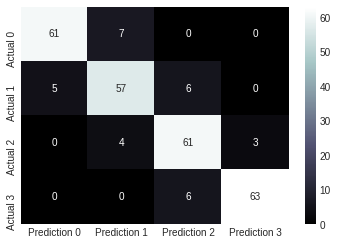

In [ ]:
sv_cm = confusion_matrix(y_test, pred_sv, labels = [0,1,2,3])
sv_cm_df = pd.DataFrame(data = sv_cm,  
                        columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                        index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(sv_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
sv_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,61,7,0,0
Actual 1,5,57,6,0
Actual 2,0,4,61,3
Actual 3,0,0,6,63


In [ ]:
print(classification_report(y_test, pred_sv))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91        68
           1       0.84      0.84      0.84        68
           2       0.84      0.90      0.87        68
           3       0.95      0.91      0.93        69

    accuracy                           0.89       273
   macro avg       0.89      0.89      0.89       273
weighted avg       0.89      0.89      0.89       273



## K-Nearest Neighbors

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred_kn = kn.predict(X_test_sc)

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_kn = pd.DataFrame(data = {
    "Training" : kn.score(X_train_sc, y_train),
    "Testing"  : kn.score(X_test_sc, y_test)
}, index = ['K-Nearest Neighbors'])

fit_kn

,Training,Testing
K-Nearest Neighbors,0.714932,0.501832


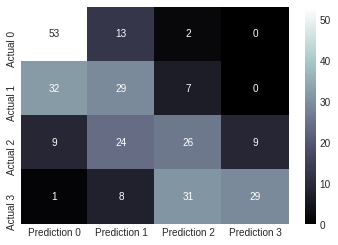

In [ ]:
kn_cm = confusion_matrix(y_test, pred_kn, labels = [0,1,2,3])
kn_cm_df = pd.DataFrame(data = kn_cm,  columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                          index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(kn_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
kn_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,53,13,2,0
Actual 1,32,29,7,0
Actual 2,9,24,26,9
Actual 3,1,8,31,29


In [ ]:
print(classification_report(y_test, pred_kn))


              precision    recall  f1-score   support

           0       0.56      0.78      0.65        68
           1       0.39      0.43      0.41        68
           2       0.39      0.38      0.39        68
           3       0.76      0.42      0.54        69

    accuracy                           0.50       273
   macro avg       0.53      0.50      0.50       273
weighted avg       0.53      0.50      0.50       273



## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_dt = dt.predict(X_test)

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_dt = pd.DataFrame(data = {
    "Training" : dt.score(X_train, y_train),
    "Testing"  : dt.score(X_test, y_test)
}, index = ['Decision Tree'])

fit_dt

,Training,Testing
Decision Tree,1.0,0.824176


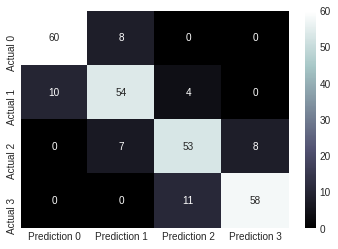

In [ ]:
dt_cm = confusion_matrix(y_test, pred_dt, labels = [0,1,2,3])
dt_cm_df = pd.DataFrame(data = dt_cm,  columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                          index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(dt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
dt_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,60,8,0,0
Actual 1,10,54,4,0
Actual 2,0,7,53,8
Actual 3,0,0,11,58


In [ ]:
print(classification_report(y_test, pred_dt))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87        68
           1       0.78      0.79      0.79        68
           2       0.78      0.78      0.78        68
           3       0.88      0.84      0.86        69

    accuracy                           0.82       273
   macro avg       0.82      0.82      0.82       273
weighted avg       0.82      0.82      0.82       273



## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf = rf.predict(X_test)

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_rf = pd.DataFrame(data = {
    "Training" : rf.score(X_train, y_train),
    "Testing"  : rf.score(X_test, y_test)
}, index = ['Random Forest'])

fit_rf

,Training,Testing
Random Forest,1.0,0.879121


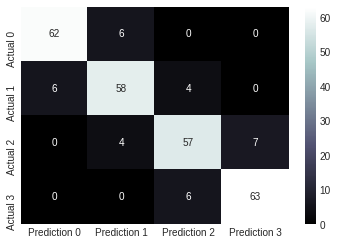

In [ ]:
rf_cm = confusion_matrix(y_test, pred_rf, labels = [0,1,2,3])
rf_cm_df = pd.DataFrame(data = rf_cm,  columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                          index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(rf_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
rf_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,62,6,0,0
Actual 1,6,58,4,0
Actual 2,0,4,57,7
Actual 3,0,0,6,63


In [ ]:
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        68
           1       0.85      0.85      0.85        68
           2       0.85      0.84      0.84        68
           3       0.90      0.91      0.91        69

    accuracy                           0.88       273
   macro avg       0.88      0.88      0.88       273
weighted avg       0.88      0.88      0.88       273



# 7) Optimization

## Logistic Regression

In [ ]:
lr_t = LogisticRegression( )

param_lr = {
    "penalty": ['l1', 'l2', 'elasticnet'], 
    "C" : np.logspace(-4,4,10),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class' : ['ovr']
}

grid_lr = GridSearchCV(
    estimator = lr_t,
    param_grid = param_lr,
    cv = 5,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [ ]:
grid_lr.fit(X_train_sc, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   23.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'multi_class': ['ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'so

In [ ]:
pred_lrt = grid_lr.predict(X_test_sc)

In [ ]:
grid_lr.best_params_

{'C': 21.54434690031882,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_lrt = pd.DataFrame(data = {
    "Training" : grid_lr.best_score_,
    "Testing"  : accuracy_score(y_test, pred_lrt)
}, index = ['Tuned Logistic Regression'])

fit_lrt

,Training,Testing
Tuned Logistic Regression,0.854569,0.882784


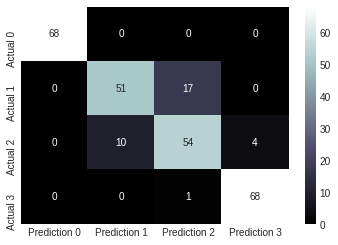

In [ ]:
lrt_cm = confusion_matrix(y_test, pred_lrt, labels = [0,1,2,3])
lrt_cm_df = pd.DataFrame(data = lrt_cm,  columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                          index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(lrt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
lrt_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,68,0,0,0
Actual 1,0,51,17,0
Actual 2,0,10,54,4
Actual 3,0,0,1,68


In [ ]:
print(classification_report(y_test, pred_lrt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.84      0.75      0.79        68
           2       0.75      0.79      0.77        68
           3       0.94      0.99      0.96        69

    accuracy                           0.88       273
   macro avg       0.88      0.88      0.88       273
weighted avg       0.88      0.88      0.88       273



In [ ]:
train_lrt = grid_lr.best_score_
acc_lrt = accuracy_score(y_test, pred_lrt)

## Support Vector Machine

In [ ]:
sv_t = SVC()

param_sv = {
    "kernel": ['linear','rbf', 'sigmoid'], 
    "C" : np.logspace(-4,4,15),
    # "degree": [2,3,5,6],
    "gamma" : ['scale', 'auto'],
    "max_iter" : [4000,5000,8000],
    "decision_function_shape" : ['ovr']
}

grid_sv = GridSearchCV(
    estimator = sv_t,
    param_grid = param_sv,
    cv = 5,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [ ]:
grid_sv.fit(X_train_sc, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 3.72759372e-04, 1....
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'max_iter': [4000, 5000, 8000]},
             p

In [ ]:
pred_svt = grid_sv.predict(X_test_sc)

In [ ]:
grid_sv.best_params_

{'C': 51.79474679231202,
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 4000}

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_svt = pd.DataFrame(data = {
    "Training" : grid_sv.best_score_,
    "Testing"  : accuracy_score(y_test, pred_svt)
}, index = ['Tuned Support Vector Machine'])

fit_svt

,Training,Testing
Tuned Support Vector Machine,0.968322,0.981685


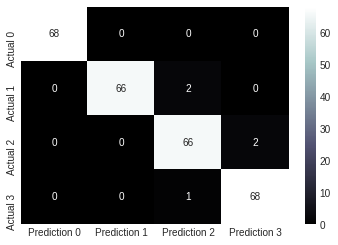

In [ ]:
svt_cm = confusion_matrix(y_test, pred_svt, labels = [0,1,2,3])
svt_cm_df = pd.DataFrame(data = svt_cm,  columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                          index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(svt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
svt_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,68,0,0,0
Actual 1,0,66,2,0
Actual 2,0,0,66,2
Actual 3,0,0,1,68


In [ ]:
print(classification_report(y_test, pred_svt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      0.97      0.99        68
           2       0.96      0.97      0.96        68
           3       0.97      0.99      0.98        69

    accuracy                           0.98       273
   macro avg       0.98      0.98      0.98       273
weighted avg       0.98      0.98      0.98       273



## K-Nearest Neighbors

In [ ]:
kn_t = KNeighborsClassifier()

param_kn = {
    "n_neighbors": [5,3,7,9,15], 
    "weights" : ['uniform', 'distance'],
    "p": [1,2]
}

grid_kn = GridSearchCV(
    estimator = kn_t,
    param_grid = param_kn,
    cv = 5,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [ ]:
grid_kn.fit(X_train_sc, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 3, 7, 9, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
pred_knt = grid_kn.predict(X_test_sc)

In [ ]:
grid_kn.best_params_

{'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_knt = pd.DataFrame(data = {
    "Training" : grid_kn.best_score_,
    "Testing"  : accuracy_score(y_test, pred_knt)
}, index = ['Tuned K-Nearest Neighbors'])

fit_knt

,Training,Testing
Tuned K-Nearest Neighbors,0.623153,0.637363


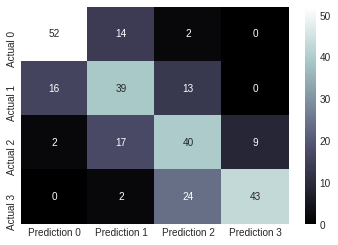

In [ ]:
knt_cm = confusion_matrix(y_test, pred_knt, labels = [0,1,2,3])
knt_cm_df = pd.DataFrame(data = knt_cm,  columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                          index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(knt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
knt_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,52,14,2,0
Actual 1,16,39,13,0
Actual 2,2,17,40,9
Actual 3,0,2,24,43


In [ ]:
print(classification_report(y_test, pred_knt))


              precision    recall  f1-score   support

           0       0.74      0.76      0.75        68
           1       0.54      0.57      0.56        68
           2       0.51      0.59      0.54        68
           3       0.83      0.62      0.71        69

    accuracy                           0.64       273
   macro avg       0.65      0.64      0.64       273
weighted avg       0.66      0.64      0.64       273



## Decision Tree

In [ ]:
dt_t = DecisionTreeClassifier()

param_dt = {
    "criterion": ['gini', 'entropynp'], 
    "max_depth" : [2,5,8,10,15,20],
    "min_samples_split": [2,4,6,10,16],
    "min_samples_leaf" : [1,3,5,11,15],
    "max_features" : ['auto', 'sqrt','log2']
}

grid_dt = GridSearchCV(
    estimator = dt_t,
    param_grid = param_dt,
    cv = 5,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)


In [ ]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   12.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropynp'],
                   

In [ ]:
pred_dtt = grid_dt.predict(X_test)

In [ ]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 16}

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_dtt = pd.DataFrame(data = {
    "Training" : grid_dt.best_score_,
    "Testing"  : accuracy_score(y_test, pred_dtt)
}, index = ['Tuned Decision Tree'])

fit_dtt

,Training,Testing
Tuned Decision Tree,0.733647,0.520147


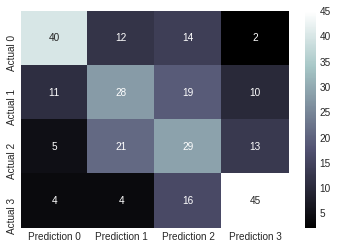

In [ ]:
dtt_cm = confusion_matrix(y_test, pred_dtt, labels = [0,1,2,3])
dtt_cm_df = pd.DataFrame(data = dtt_cm,  columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                          index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(dtt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
dtt_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,40,12,14,2
Actual 1,11,28,19,10
Actual 2,5,21,29,13
Actual 3,4,4,16,45


In [ ]:
print(classification_report(y_test, pred_dtt))


              precision    recall  f1-score   support

           0       0.67      0.59      0.62        68
           1       0.43      0.41      0.42        68
           2       0.37      0.43      0.40        68
           3       0.64      0.65      0.65        69

    accuracy                           0.52       273
   macro avg       0.53      0.52      0.52       273
weighted avg       0.53      0.52      0.52       273



## Random Forest

In [ ]:
rf_t = RandomForestClassifier()

param_rf = {
    "n_estimators": [100, 300, 500, 1000], 
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [2,5,8,10,15,20],
    "min_samples_split": [2,4,6,10,16],
    "min_samples_leaf" : [1,3,5,11,15],
    "max_features" : ['auto', 'sqrt','log2']
}

grid_rf = RandomizedSearchCV(
    estimator = rf_t,
    param_distributions = param_rf,
    cv = 5,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)



In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
pred_rft = grid_rf.predict(X_test)

In [ ]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [ ]:
# OVERFIT/UNDERFIT CHECK

fit_rft = pd.DataFrame(data = {
    "Training" : grid_rf.best_score_,
    "Testing"  : accuracy_score(y_test, pred_rft)
}, index = ['Tuned Random Forest'])

fit_rft

,Training,Testing
Tuned Random Forest,0.871373,0.857143


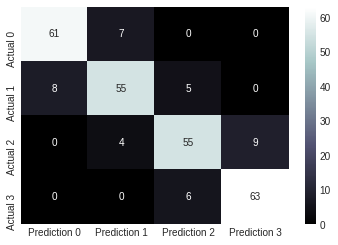

In [ ]:
rft_cm = confusion_matrix(y_test, pred_rft, labels = [0,1,2,3])
rft_cm_df = pd.DataFrame(data = rft_cm,  columns = ['Prediction 0', 'Prediction 1','Prediction 2', 'Prediction 3'], 
                          index = ['Actual 0', 'Actual 1','Actual 2', 'Actual 3'])

sns.heatmap(rft_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
rft_cm_df


,Prediction 0,Prediction 1,Prediction 2,Prediction 3
Actual 0,61,7,0,0
Actual 1,8,55,5,0
Actual 2,0,4,55,9
Actual 3,0,0,6,63


In [ ]:
tp_rft = rft_cm_df['Prediction 1'][0]
tn_rft = rft_cm_df['Prediction 0'][1]
fp_rft = rft_cm_df['Prediction 1'][1]
fn_rft = rft_cm_df['Prediction 0'][0]

In [ ]:
print(classification_report(y_test, pred_rft))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        68
           1       0.83      0.81      0.82        68
           2       0.83      0.81      0.82        68
           3       0.88      0.91      0.89        69

    accuracy                           0.86       273
   macro avg       0.86      0.86      0.86       273
weighted avg       0.86      0.86      0.86       273



## Summary

In [ ]:
model_summary = pd.concat([fit,fit_sv,fit_kn,fit_dt,fit_rf,
                           fit_lrt,fit_svt,fit_knt,fit_dtt,fit_rft])
model_summary

,Training,Testing
Logistic Regression,0.965094,0.959707
Support Vector Machine,0.978022,0.886447
K-Nearest Neighbors,0.714932,0.501832
Decision Tree,1.000000,0.824176
Random Forest,1.000000,0.879121
Tuned Logistic Regression,0.854569,0.882784
Tuned Support Vector Machine,0.968322,0.981685
Tuned K-Nearest Neighbors,0.623153,0.637363
Tuned Decision Tree,0.733647,0.520147
Tuned Random Forest,0.871373,0.857143


# 8) Conclusion
1.  Higher the RAM, higher its price.
2. RAM has the highest coefficient to the price range. Means that mobile phone's RAM is affecting in predicting price range. Besides RAM, there are battery power, pixels resolution and internal memory that affect mobile phone's price.
3. The average of RAM of phone which sold is about 2 GB of RAM with its internal memory 32 GB and clock speed about 1,5 GHz quad-core. And also with battery power about 1200 mAh.
4. The best Machine Learning model's accuracy is 0.98 of 1.00 with Support Vector Machine Classifier algorithm.

# 9) Recommendation
1. Mr. Bob can actually can build and sell his phones with the minimum specification like 2 GB of RAM, 32 GB of internal memory, quad-core 1,5 GHz, and the battery power minimum 1200 mAh.
2. If Mr. Bob hesitated by the price range, he does not have to worry because he can use Machine Learning model to predict whether his phone could have a price range level 0, 1, 2, or 3.